<a href="https://colab.research.google.com/github/Asif-PA/NetflixMovies-TVShowsClustering/blob/main/Asif_NetflixMovies%26TVShowsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
!pip install mapclassify
!pip install geopandas
# Import Libraries
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import math
from scipy.stats import *

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Load Dataset
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/netflix capstone/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive/


### Dataset First View

In [3]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'The number of rows in the dataset is: {df.shape[0]}')
print(f'The number of columns in the dataset is: {df.shape[1]}')

The number of rows in the dataset is: 7787
The number of columns in the dataset is: 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

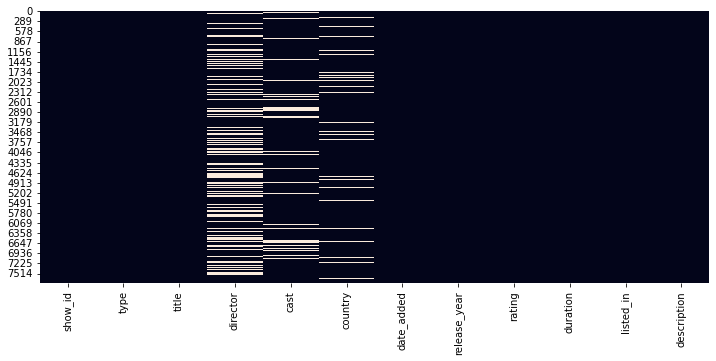

In [9]:
# Visualizing the missing values
#plotting missing values in heatmap
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)


In [10]:
from pandas.core import missing
# calulating perscentage of null values in the columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data
     

,Total,Percent
director,2389,0.306793
cast,718,0.092205
country,507,0.065109
date_added,10,0.001284
rating,7,0.000899
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


### What did you know about your dataset?

*   **Our dataset contain 7787 rows and 12 columns.**
*   **Datatype of all variables is object except release_year which is int64.**


*   **There is no duplicates in dataset**
*   **Maximum number of null values present in director column followed by cast.**



## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description 

*   show_id:Unique ID for every Movie / Tv Show

*   type : Identifier - A Movie or TV Show

*   title : Title of the Movie / Tv Show

*   director : Director of the Movie

*   cast : Actors involved in the movie / show
*   country : Country where the movie / show was produced


*   date_added : Date it was added on Netflix


*   release_year : Actual Releaseyear of the movie / show


*   rating : TV Rating of the movie / show


*   duration : Total Duration - in minutes or number of seasons


*   listed_in : Genere
*   description: The Summary description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.apply(lambda x: x.nunique())


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
#Changing date_added to date time format
df["date_added"] = pd.to_datetime(df['date_added'])
#Extracting Year
df['year_added'] = df['date_added'].dt.year
#Extracting Month
df['month_added'] = df['date_added'].dt.month
#Extracting Day
df['day_added'] = df['date_added'].dt.day


In [15]:
#Seperating TV Show And Movie
netflix_tvshows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [16]:
print(f'shape of netflix_tvshows: {netflix_tvshows.shape}')
print(f'shape of netflix_movies: {netflix_movies.shape}')

shape of netflix_tvshows: (2410, 15)
shape of netflix_movies: (5377, 15)


In [17]:
netflix_tvshows['duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2410, dtype: object

In [18]:
#Changing the duration format for movies
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [19]:
netflix_tvshows['duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2410, dtype: object

In [20]:
#Changing duration of tvshows to interger
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Season','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Seasons','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace('s','')
netflix_tvshows['duration']=netflix_tvshows['duration'].astype(str).astype(int)
netflix_tvshows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

### What all manipulations have you done and insights you found?

*   **I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.**
*   **Made two seperate dataframe for movies and tvshows.**

*   **Changed the duration of movies and tvshows dataframe into string.**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [21]:
#made a custom function for the countplot as it helps the reusability of the code.This fuction accepts 6 positional arguments and 1 optional argument
def create_countplot( x, title, xlabel, ylabel,figsize,hue=None,order=None,data=None):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=x,hue=hue,order=order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
    plt.tight_layout()  
    plt.show()

#### Chart - 1 **Visualisaztion of most watch type**

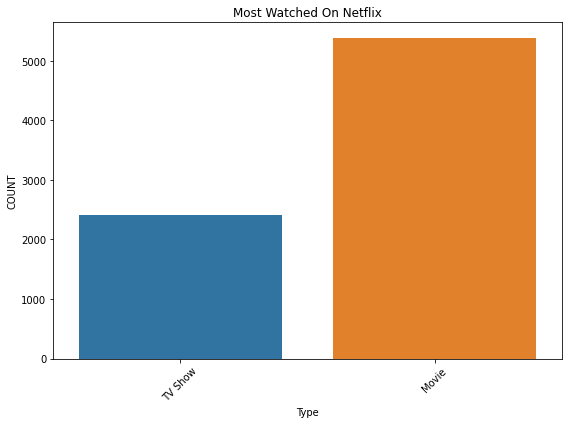

In [22]:
#using countplot function for the visualization
create_countplot(data=df,x='type',title='Most Watched On Netflix',xlabel='Type',ylabel='COUNT',figsize=(8, 6))

In [23]:
# Create a piechart
#Ploting Donut chart for better visualisation
# Create data for the chart
labels = df.type.value_counts().sort_index().index
values = df.type.value_counts().sort_index().values
# Create the donut chart
fig = px.pie(values=values, names=labels,height=500, width=600, hole=.5,title='Mostly watched on Netflix')
fig.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
# Display the chart
fig.show()


##### 1. Why did you pick the specific chart?

**I have used two plot:**

**1)Countplot- Show the counts of observations in each categorical bin using bars.**

**2)Donut Chart-A donut chart is almost identical to a pie chart, but the center is cut out (hence the name ‘donut’). Donut charts are also used to show proportions of categories that make up the whole, but the center can also be used to display data.**

##### 2. What is/are the insight(s) found from the chart?

**Movies are getting watched mostly than TV shows.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that TV shows are less than movies so Netflix should release more contents of tv shows also to retain its viewer.**

#### Chart - 2 **Visualisation of Top 10 Directors**

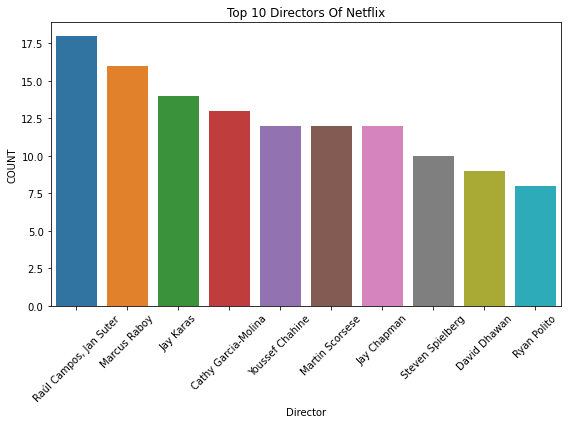

In [24]:
# Chart - 2 visualization code
#using countplot function for the visualization
create_countplot(data=df,x='director',title='Top 10 Directors Of Netflix',xlabel='Director',ylabel='COUNT',figsize=(8, 6),order=df.director.value_counts().head(10).index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Raul Campos, jan suter is most famous director among all.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**If movie/Tvshows will be directed by Top directors than movies/TVshows will earn more revenue due to fanbase of directors.**

#### Chart - 3 **Top 10 Actors**

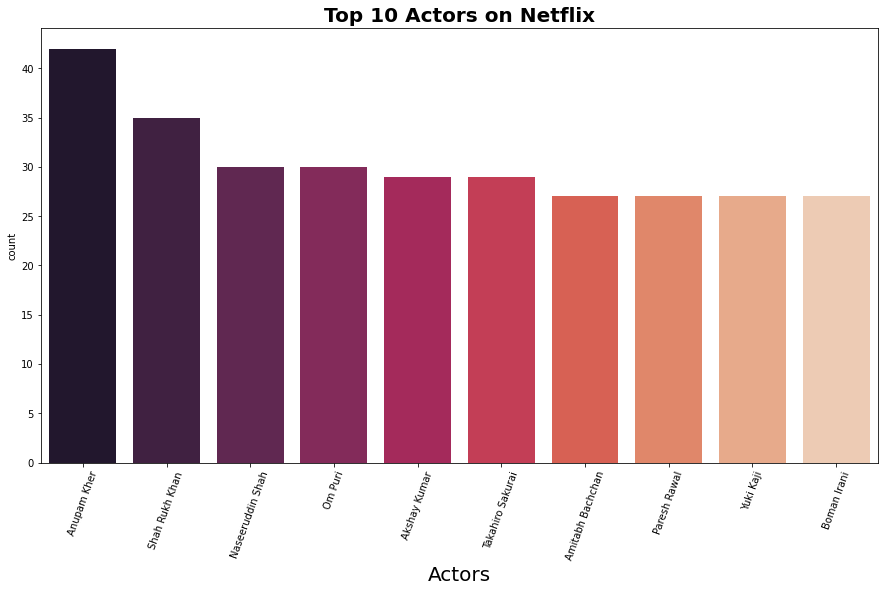

In [25]:
# Chart - 3 visualization code
actor = df[df.cast != ' '].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(15,8))
sns.countplot(x= actor, order=actor.value_counts().index[:10], palette='rocket')
plt.xticks(rotation = 70)
plt.xlabel("Actors",size=20)
plt.title('Top 10 Actors on Netflix',fontsize=20,fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.



##### 2. What is/are the insight(s) found from the chart?

**We can see the most preferable actor by Netflix is Anupan Kher followed by Shah Rukh khan.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Casting famous actors in movies/Tvshows will help in earning more revenue.**

#### Chart - 4 **Visualisation of Content Released in Month**

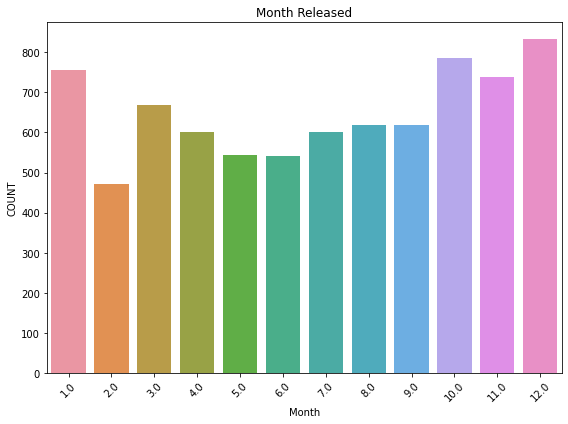

In [26]:
# Chart - 4 visualization code
#Visualising in which month maximum content was released

#using countplot function for the visualization
create_countplot(data=df,x='month_added',title='Month Released',xlabel='Month',ylabel='COUNT',figsize=(8, 6))




##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the content was released in month of October,November,December and January.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Very less contents are released in mid of year so it can be filled by releasing more contents which will increase viewer on Netflix.**

#### Chart -5 **Visualisation of Yearly content Released on Netflix**


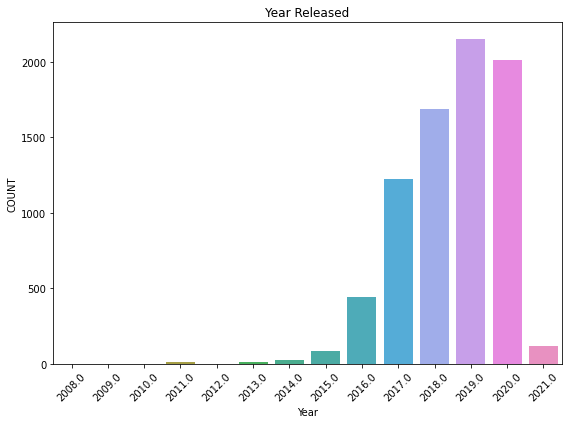

In [27]:
# Chart - 5 visualization code
# Release of movies year-wise
#using countplot function for the visualization
create_countplot(data=df,x='year_added',title='Year Released',xlabel='Year',ylabel='COUNT',figsize=(8, 6))

     

##### 2. What is/are the insight(s) found from the chart?

**We can see that content released on netflix was continuously increasing till 2019 after it started decreasing and there was sudden downfall in 2021 due to covid.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that there is increasing trend of released source on netflix till 2020 and there after sudden downfall in 2021 this could be due to the impact of lockdown.**

#### Chart - 6 **Top 10 Genre On Netflix**

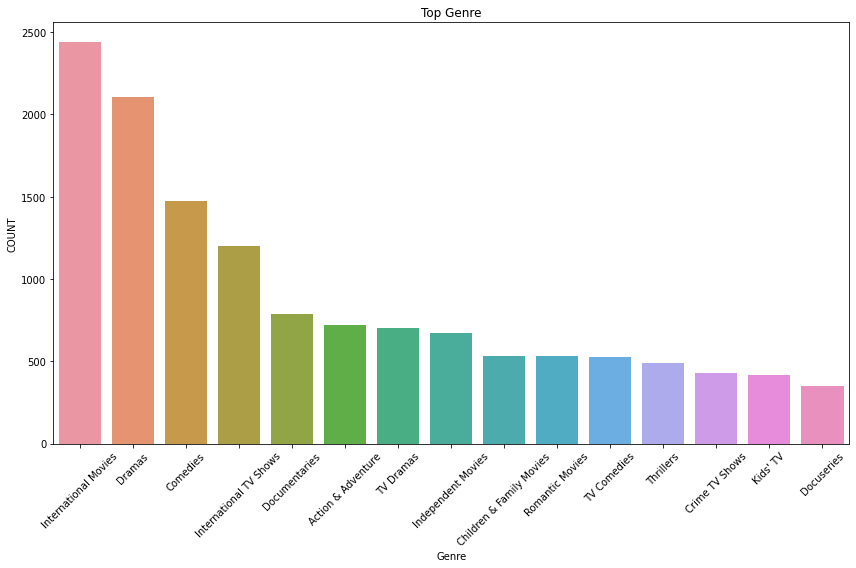

In [28]:
# Chart - 6 visualization code
# Making relevant dataframe for our observation
genre = df[df.listed_in != ' '].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
create_countplot(x=genre,title='Top Genre',xlabel='Genre',ylabel='COUNT',figsize=(12, 8),order=genre.value_counts().index[:15])

     


##### 1. Why did you pick the specific chart?

We have used count plot to count the observations in variables and displayed it using bar.

##### 2. What is/are the insight(s) found from the chart?

**Most of the contents on netflix is covered by International Movies and Dramas.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#  Chart - 7 **Rating**

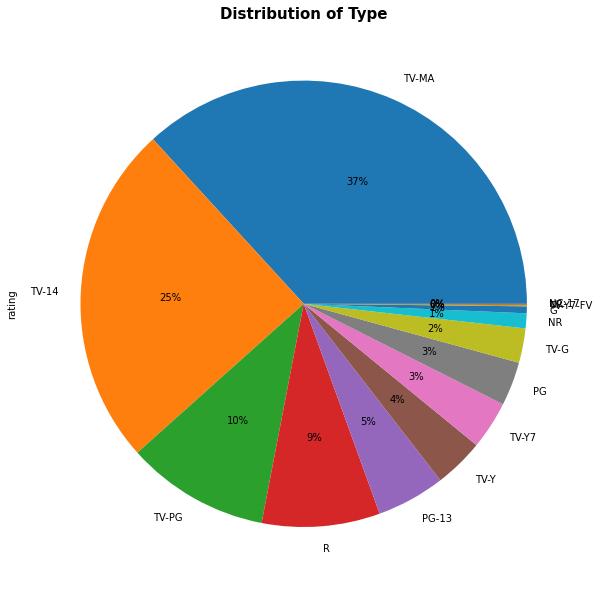

In [29]:
# Chart - 7 visualization code
plt.figure(figsize=(10,35))
df.rating.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of Type', fontsize=15,fontweight='bold')
plt.show()



##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the content released on netflix is TV-MA(Mature Audience)rated followed by TV-14(Not Suitable for age under14).**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Most content on Netflix is TV-MA(Mature Audience) rated,they should add content for other ratings also for rest of the audience.**

#### Chart - 8 **Duration of Movies**

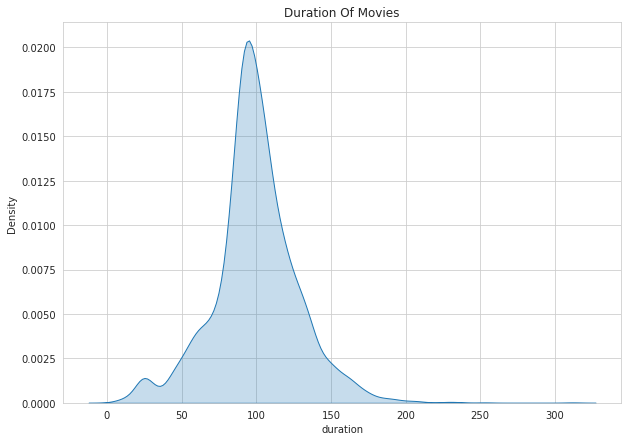

In [30]:
# Chart - 8 visualization code
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.title('Duration Of Movies')
plt.show()

##### 1. Why did you pick the specific chart?

I have used kde(kernel density estimate)plot, it is used to visualize the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

##### 2. What is/are the insight(s) found from the chart?

**We can see that duration of most of the movies is approx 90 minutes.**

#### Chart - 9 **Duraton Of Tv Shows**

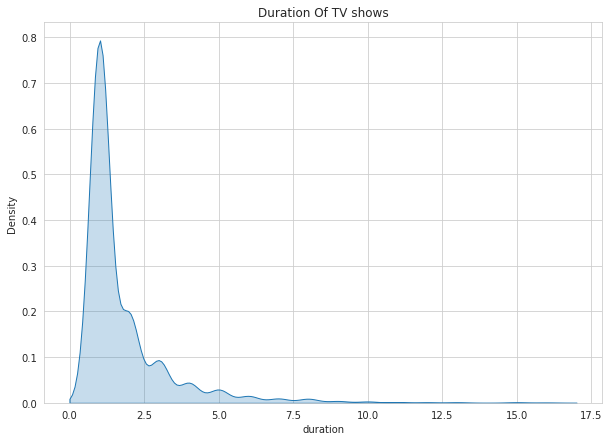

In [31]:
# Chart - 9 visualization code
plt.figure(figsize=(10,7))
sns.kdeplot(data=netflix_tvshows['duration'], shade=True)
plt.title('Duration Of TV shows')
plt.show()

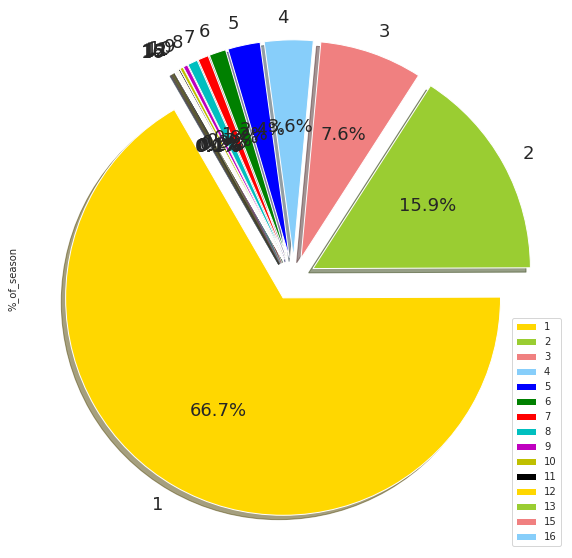

In [32]:
relevant_df = netflix_tvshows[['type','duration']].copy()
length = len(relevant_df)

relevant_df = relevant_df.groupby('duration').agg(['count'])
relevant_df= relevant_df.droplevel(0,axis=1)

relevant_df.reset_index(inplace = True)
relevant_df['%_of_season'] = ((relevant_df['count']/length)*100)
relevant_df.columns
relevant_df.set_index('duration',inplace = True)
relevant_df.drop('count',axis =1,inplace = True)

# Specifying labels, colours and executing pie chart
labels = ['0 - 40','41 - 50','51 - 60','61 - 70']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','b','g','r','c','m','y','k']
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)
relevant_df.plot.pie(figsize = (15,10),fontsize = 18,explode=explode, colors=colors,autopct='%1.1f%%', shadow=True,startangle=120,subplots = True)
plt.show()

##### 1. Why did you pick the specific chart?

I have used kde(kernel density estimate), it is used to visualize the distribution of observations in a dataset, analogous to a histogram.

A pie chart helps organize and show data as a percentage of a whole.

##### 2. What is/are the insight(s) found from the chart?

Most of the tv shows are 1 season long which is 66.7% of complete Tvshows.



#### Chart - 10 **Word Analysis in Titles**

In [33]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

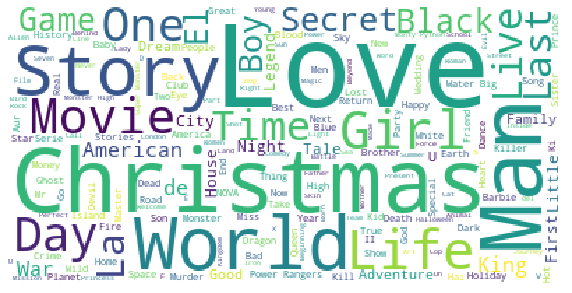

In [34]:
# Chart - 10 visualization code
#Visualising most of the word used in Title using word cloud
#Creating the dataframe for word cloud
plt.figure(figsize=(10,7))
df_wc=df['title']
text=" ".join(i for i in df_wc)
#create stopword list
stopwords=set(STOPWORDS)
#generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
#Display the generated images
plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

**It seems like Christmas,Love','Man','World','Story','Life' is mostly used words in titles.**

#### Chart - 11 **Country vs Content**

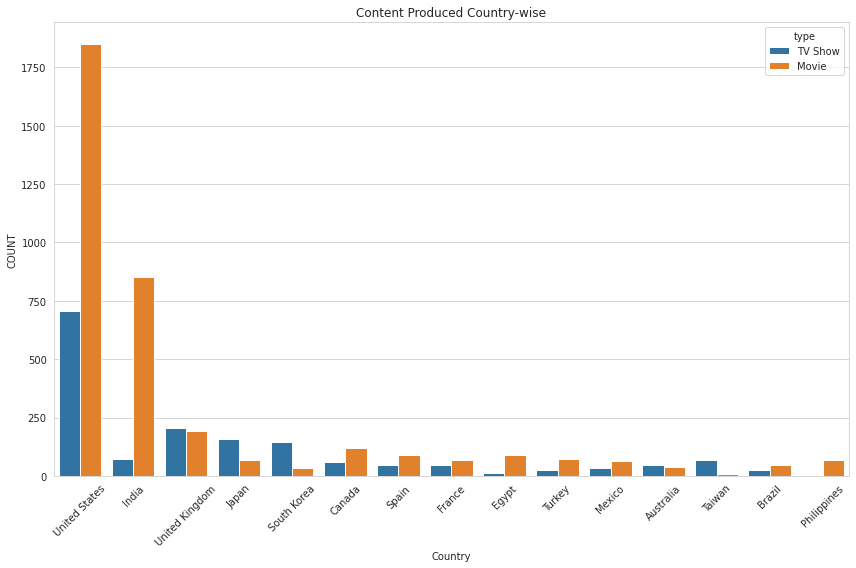

In [35]:
# Chart - 11 visualization code
#Ploting top 15 Countries vs Content
create_countplot(data=df,x='country',title='Content Produced Country-wise',xlabel='Country',ylabel='COUNT',figsize=(12, 8),order=df['country'].value_counts().index[0:15],hue='type')

     


##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.



##### 2. What is/are the insight(s) found from the chart?

**United States having highest number of content on Netflix compare to other Countries.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that very less content is available on Netflix for Countries other than United States so Netflix should release more content for such Country also to increase its market value.**

#### Chart - 12 **Type Vs Ratng**

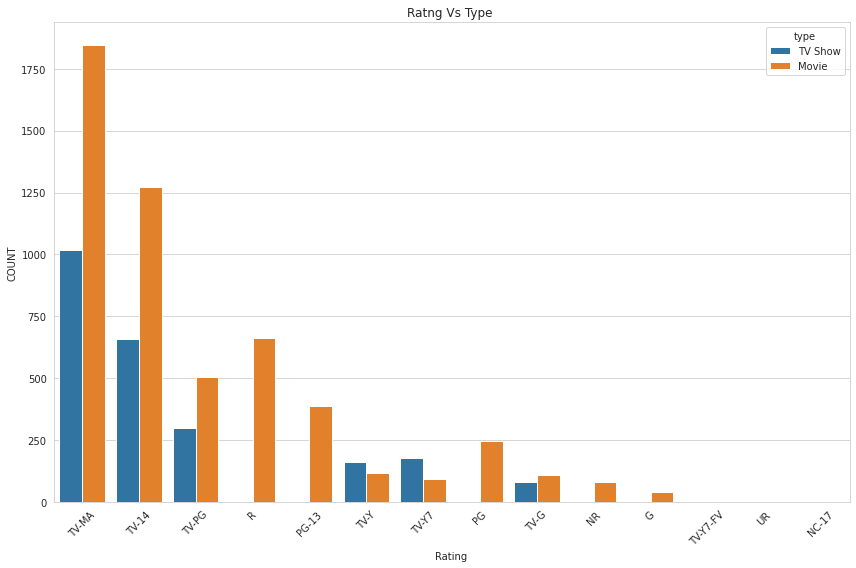

In [36]:
# Chart - 12 visualization code
create_countplot(data=df,x='rating',title='Ratng Vs Type ',xlabel='Rating',ylabel='COUNT',figsize=(12, 8),order=df['rating'].value_counts().index[0:15],hue='type')



##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.



##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the Movie and Tv shows are TV-MA(Mature Audience) rated.**

#### Chart - 13

In [37]:
# Chart - 13 visualization code
# making relevant dataframe for our observation
country = df[df.country != ' '].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country = pd.DataFrame(country.value_counts().reset_index().rename(columns = {'index' : 'name',
                                                                              0 : 'count'}))

# renaming the countries according to realtime stats as available on geopandas
country.replace({'name' : {'West Germany' : 'Germany',
                        'East Germany' : 'Germany',
                        'Soviet Union' : 'Russia',
                        'United States,' : 'United States of America',
                        'United States' : 'United States of America',
                        'United Kingdom,' : 'United Kingdom',
                        'Cambodia,' : 'Cambodia',
                        'Poland,': 'Poland',
                        'Czech Republic' : 'Czechia',
                        'Vatican City' : 'Italy',
                        'Hong Kong' : 'China',
                        'Singapore' : 'Malaysia',
                        'Liechtenstein' : 'Germany',
                        'Cayman Islands' : 'United Kingdom',
                        'Bermuda' : 'United Kingdom'}}, inplace = True)
# let's have a look at our data frame
country

,name,count
0,United States of America,3296
1,India,990
2,United Kingdom,722
3,Canada,412
4,France,349
...,...,...
116,Dominican Republic,1
117,Samoa,1
118,Azerbaijan,1
119,United Kingdom,1


In [38]:
# getting the world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# merging our data with world map
merge = pd.merge(world,country,how = 'left', left_on = 'name', right_on = 'name')
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",412.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3296.0
...,...,...,...,...,...,...,...
185,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7.0
186,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.0
187,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
188,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


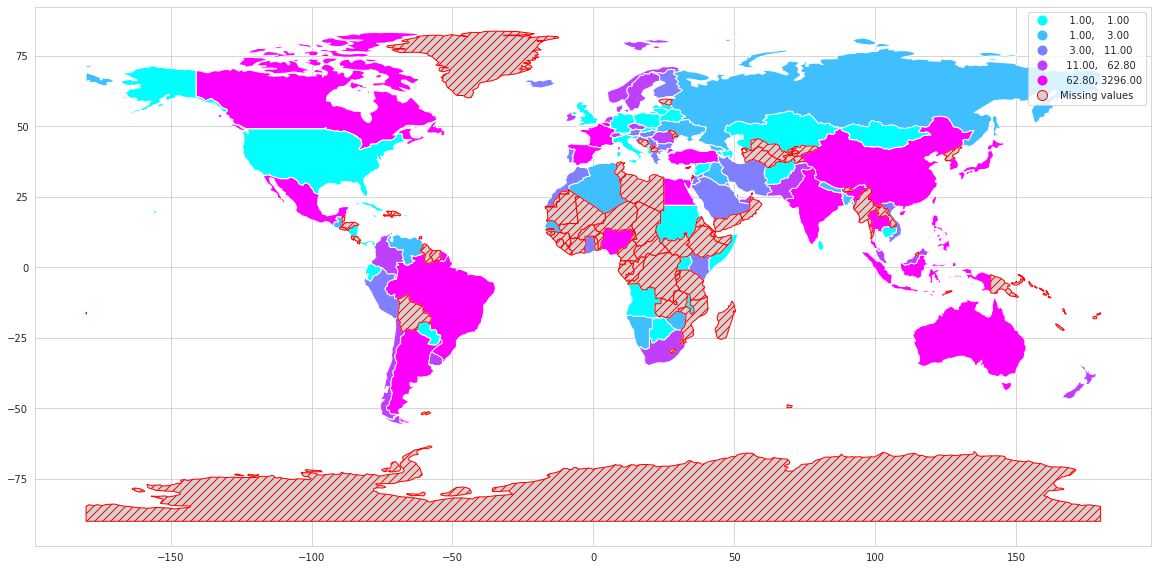

In [39]:
# Plotting our data into the world map
merge.plot(
    column="count",
    legend=True,
    scheme="quantiles",
    cmap='cool',
    figsize=(20,20),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"})
plt.show()


##### 1. Why did you pick the specific chart?

World map is used to show from which region most of the content was released.

##### 2. What is/are the insight(s) found from the chart?

**We dont have any content from Antartica and most of the regions of Africa**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The above map shows that most of the content is coming from USA,India,China and some part of South America.**

#### Chart - 14 - Correlation Heatmap

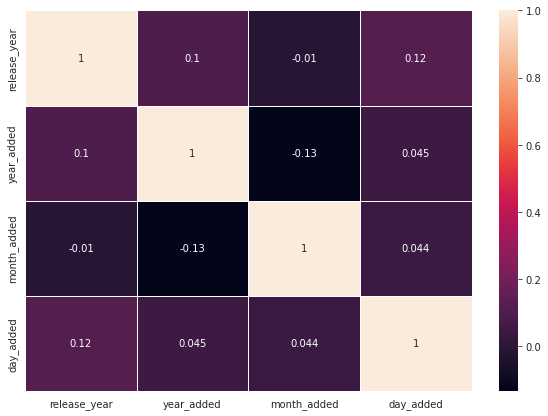

In [40]:
# Correlation Heatmap visualization code
plt.figure (figsize= (10,7))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

**Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the numeric columns are not much correlated to each other. In our dataset most of the variables was characterbased so heatmap is only showing relationship for numeric columns.These three numeric columns shows date,so there is not much correlation between them.**

#### Chart - 15 - Pair Plot 

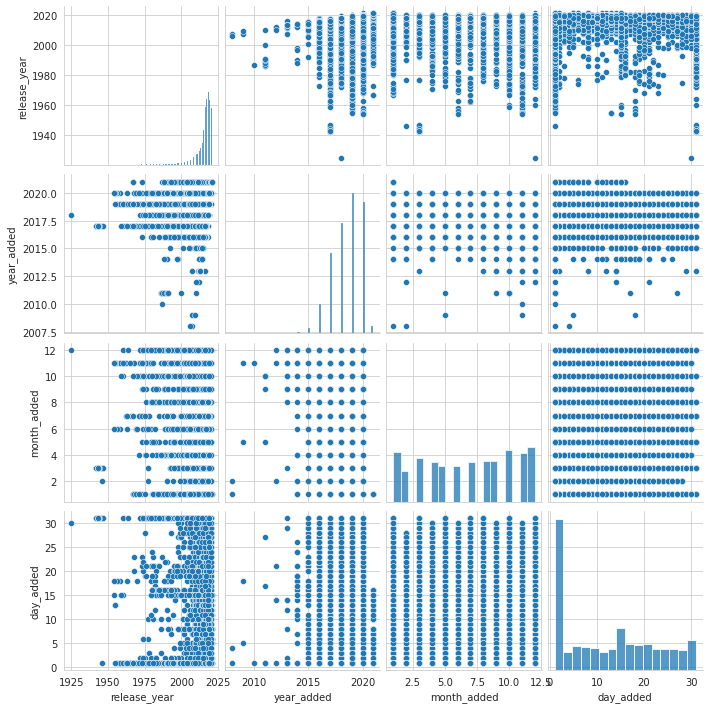

In [76]:
# Pair Plot visualization code
sns.pairplot(data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [77]:
#helper functions 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [78]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
#creating instance of the class
findz = findz()
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"


In [79]:
zcdf = lambda x: norm(0,1).cdf(x)
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis - Atleast 25 percent of shows(movies & TV shows included) consist of International genre**

**Alternate Hypothesis - Less than 25 percent of shows(movies & TV shows included) consist of International genre**

#### 2. Perform an appropriate statistical test.

In [80]:
# Making relevant dataframe for our hypothesis test
relevant_df = genre.copy()
relevant_df = relevant_df.sample(1000,random_state=42)
relevant_df = relevant_df.reset_index()
relevant_df.rename(columns = {0 : 'type'}, inplace = True)
count = relevant_df[relevant_df['type'] == 'International TV Shows'].count()
count = count + relevant_df[relevant_df['type'] == 'International Movies'].count()
count

title    207
type     207
dtype: int64

In [81]:
# Perform Statistical Test to obtain P-Value
val = 207
p_hyp = 0.25
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'l') #left tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0008439436732277457


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***